In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import json 
import matplotlib.pyplot as plt 
import pickle 
from wordcloud import WordCloud
from ast import literal_eval
import os

In [3]:
credits=pd.read_csv("tmdb_5000_credits.csv")

In [6]:
movies_df=pd.read_csv("tmdb_5000_movies.csv")

In [8]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
credits.tail()

,movie_id,title,cast,crew
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4802,25975,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


In [10]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [11]:
print("credits:",credits.columns)
print("movies_df:",movies_df.columns)

credits: Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')
movies_df: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [12]:
print("credits:",credits.shape)
print("movies_df:",movies_df.shape)

credits: (4803, 4)
movies_df: (4803, 20)


In [13]:
credits_column_renamed=credits.rename(index=str,columns={"movie_id":"id"})
movies=movies_df.merge(credits_column_renamed,on="id")

In [14]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
movies.shape

(4803, 23)

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [17]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [18]:
movies['crew'] = movies['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
movies['crew'] = movies['crew'].apply(director)
movies.rename(columns={'crew':'director'},inplace=True)

In [19]:
from ast import literal_eval
features = ['keywords','genres']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

In [20]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        
        if len(names) > 1:
            names = names[:1]
        return names

    
    return []

In [21]:
print (type(movies.loc[0, 'genres']))

<class 'list'>


In [22]:
features = ['keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [23]:
movies['genres']

0            [Action]
1         [Adventure]
2            [Action]
3            [Action]
4            [Action]
            ...      
4798         [Action]
4799         [Comedy]
4800         [Comedy]
4801               []
4802    [Documentary]
Name: genres, Length: 4803, dtype: object

In [24]:
movies['genres']  = movies['genres'] .str.join(', ')

In [25]:
movies['genres'] 

0            Action
1         Adventure
2            Action
3            Action
4            Action
           ...     
4798         Action
4799         Comedy
4800         Comedy
4801               
4802    Documentary
Name: genres, Length: 4803, dtype: object

In [26]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,director
0,237000000,Action,http://www.avatarmovie.com/,19995,[culture clash],en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",James Cameron
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,[ocean],en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",Gore Verbinski
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,[spy],en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",Sam Mendes
3,250000000,Action,http://www.thedarkknightrises.com/,49026,[dc comics],en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",Christopher Nolan
4,260000000,Action,http://movies.disney.com/john-carter,49529,[based on novel],en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",Andrew Stanton


In [27]:
print("movies:",movies.shape)

movies: (4803, 23)


In [28]:
movies.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


In [29]:
movies.isnull().any()

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title_x                 False
vote_average            False
vote_count              False
title_y                 False
cast                    False
director                 True
dtype: bool

In [30]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
director                  30
dtype: int64

<AxesSubplot:>

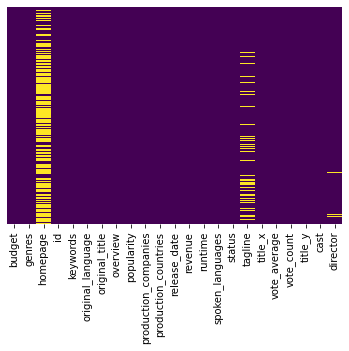

In [31]:
sns.heatmap(movies.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
movies = movies.dropna(subset = ['director','runtime'])

In [33]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3063
id                         0
keywords                   0
original_language          0
original_title             0
overview                   1
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  820
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
director                   0
dtype: int64

In [34]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,director
0,237000000,Action,http://www.avatarmovie.com/,19995,[culture clash],en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",James Cameron
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,[ocean],en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",Gore Verbinski
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,[spy],en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",Sam Mendes
3,250000000,Action,http://www.thedarkknightrises.com/,49026,[dc comics],en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",Christopher Nolan
4,260000000,Action,http://movies.disney.com/john-carter,49529,[based on novel],en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",Andrew Stanton


In [35]:
movies["revenue"]=movies["revenue"].floordiv(1000000)
movies["budget"]=movies["budget"].floordiv(1000000)

In [36]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,director
0,237,Action,http://www.avatarmovie.com/,19995,[culture clash],en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",James Cameron
1,300,Adventure,http://disney.go.com/disneypictures/pirates/,285,[ocean],en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",Gore Verbinski
2,245,Action,http://www.sonypictures.com/movies/spectre/,206647,[spy],en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",Sam Mendes
3,250,Action,http://www.thedarkknightrises.com/,49026,[dc comics],en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",Christopher Nolan
4,260,Action,http://movies.disney.com/john-carter,49529,[based on novel],en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",Andrew Stanton


In [37]:
movies = movies[movies['budget'] != 0]

In [38]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3573 entries, 0 to 4758
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3573 non-null   int64  
 1   genres                3573 non-null   object 
 2   homepage              1410 non-null   object 
 3   id                    3573 non-null   int64  
 4   keywords              3573 non-null   object 
 5   original_language     3573 non-null   object 
 6   original_title        3573 non-null   object 
 7   overview              3573 non-null   object 
 8   popularity            3573 non-null   float64
 9   production_companies  3573 non-null   object 
 10  production_countries  3573 non-null   object 
 11  release_date          3573 non-null   object 
 12  revenue               3573 non-null   int64  
 13  runtime               3573 non-null   float64
 14  spoken_languages      3573 non-null   object 
 15  status               

In [39]:
movies['release_date'] = pd.DataFrame(pd.to_datetime(movies['release_date'],dayfirst=True))
movies['release_month'] = movies['release_date'].dt.month
movies['release_DOW'] = movies['release_date'].dt.dayofweek

Text(0.5, 1.0, 'Boxplot of Runtime')

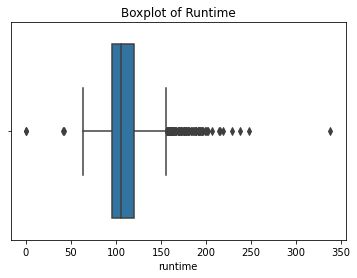

In [40]:
sns.boxplot(x=movies['runtime'])
plt.title('Boxplot of Runtime')

Text(0.5, 1.0, 'Boxplot of Revenue')

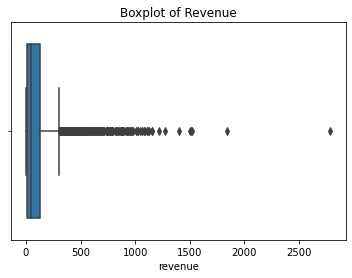

In [41]:
sns.boxplot(x=movies['revenue'])
plt.title('Boxplot of Revenue')

Text(0.5, 1.0, 'Boxplot of Budget')

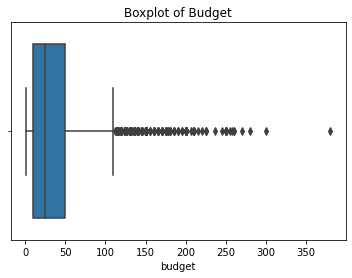

In [42]:
sns.boxplot(x=movies['budget'])
plt.title('Boxplot of Budget')

In [43]:
bq_low = movies['budget'].quantile(0.01)
bq_hi  = movies['budget'].quantile(0.99)
rq_low = movies['runtime'].quantile(0.01)
rq_hi  = movies['runtime'].quantile(0.99)
movies = movies[(movies['budget'] < bq_hi) & (movies['budget'] > bq_low) & (movies['runtime'] < rq_hi) & (movies['runtime'] > rq_low)]
movies.shape

(3332, 25)

Text(0.5, 1.0, 'Boxplot of Runtime(Outliers Removed)')

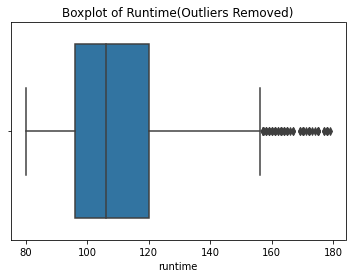

In [44]:
sns.boxplot(x=movies['runtime'])
plt.title('Boxplot of Runtime(Outliers Removed)')

Text(0.5, 1.0, 'Boxplot of Budget(Outliers Removed)')

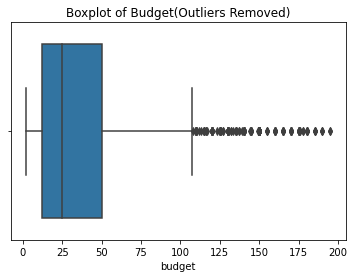

In [45]:
sns.boxplot(x=movies['budget'])
plt.title('Boxplot of Budget(Outliers Removed)')

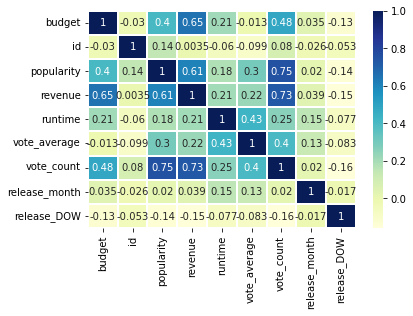

In [46]:
sns.heatmap(movies.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

In [47]:
movies['log_revenue'] = np.log1p(movies['revenue']) #we are not using log0 to avoid & and null value as there might be 0 value
movies['log_budget'] = np.log1p(movies['budget'])

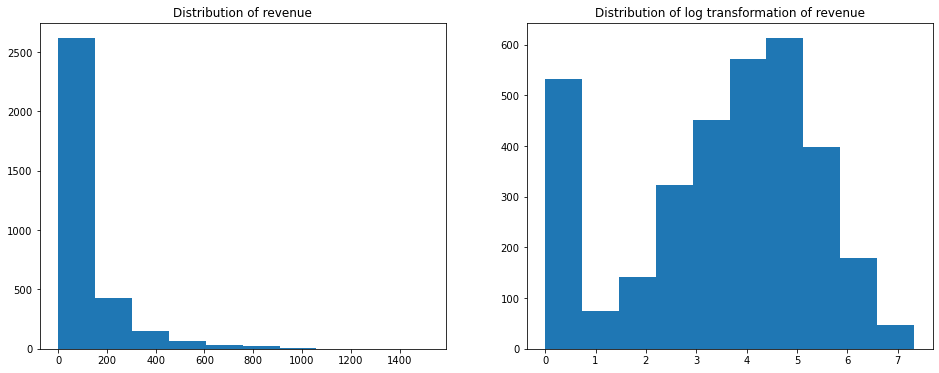

In [48]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1) 
plt.hist(movies['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(movies['log_revenue']);
plt.title('Distribution of log transformation of revenue');

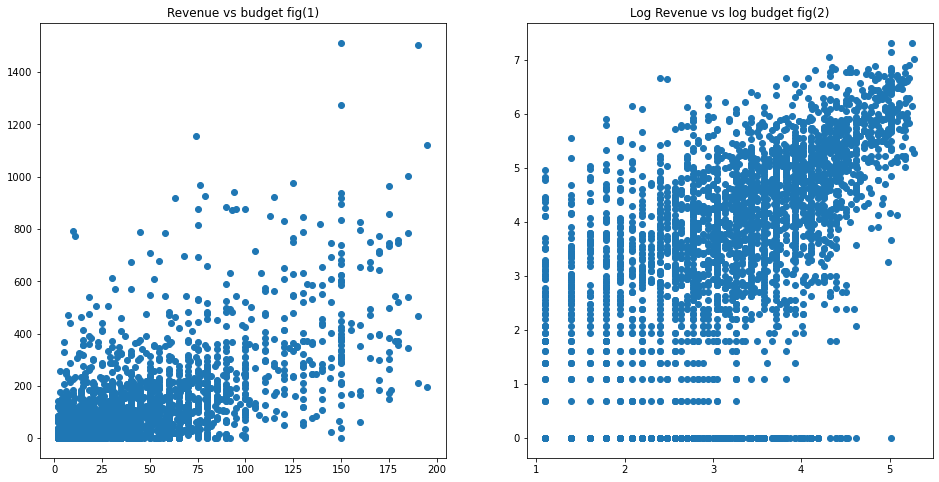

In [49]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(movies['budget'], movies['revenue'])
plt.title('Revenue vs budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(movies['log_budget'], movies['log_revenue'])
plt.title('Log Revenue vs log budget fig(2)');

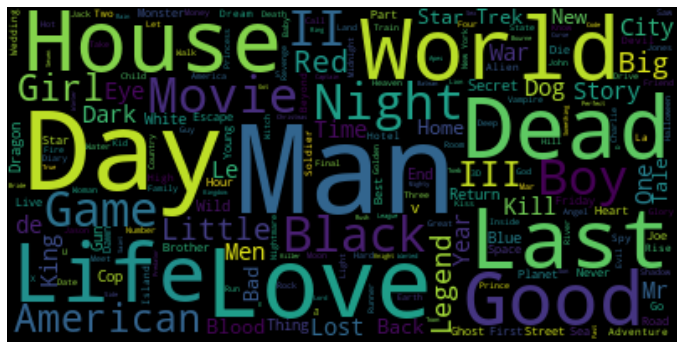

In [50]:
wordcloud = WordCloud().generate(movies.original_title.to_string())

sns.set(rc={'figure.figsize':(12,8)})


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

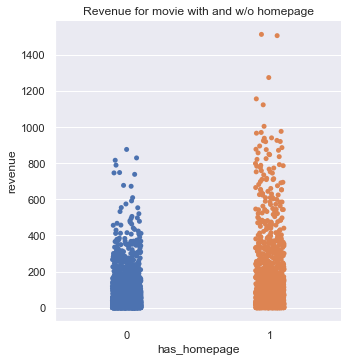

In [51]:
movies['has_homepage'] = 0
movies.loc[movies['homepage'].isnull() == False, 'has_homepage'] = 1

sns.catplot(x='has_homepage', y='revenue', data=movies);
plt.title('Revenue for movie with and w/o homepage');

G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


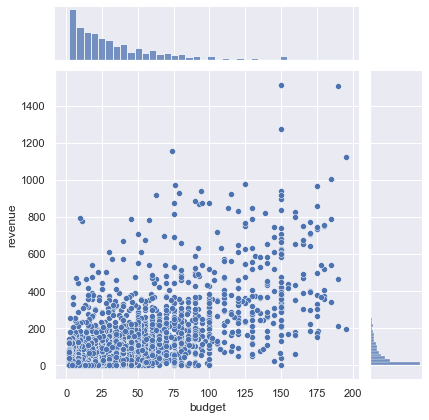

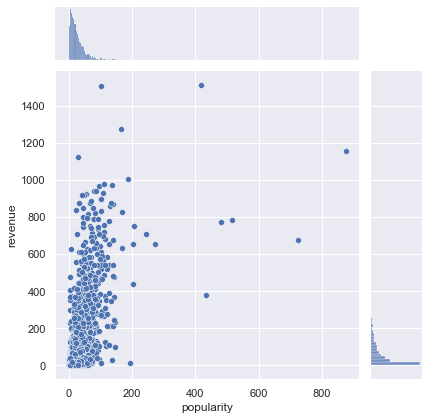

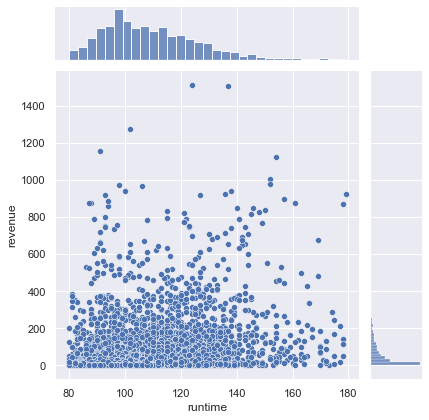

In [52]:
sns.jointplot(movies.budget, movies.revenue);
sns.jointplot(movies.popularity, movies.revenue);
sns.jointplot(movies.runtime, movies.revenue);
plt.show()

G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'revenue')

<Figure size 1080x576 with 0 Axes>

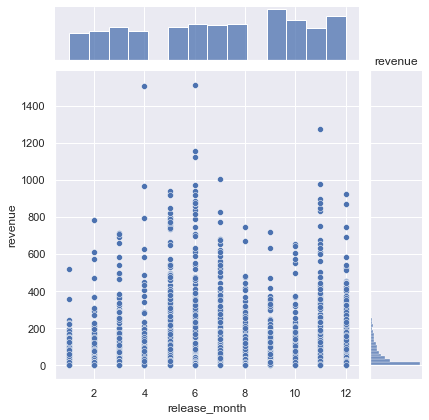

In [53]:
plt.figure(figsize=(15,8))
sns.jointplot(movies.release_month, movies.revenue);
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.title('revenue')

In [54]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3332 entries, 23 to 4758
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3332 non-null   int64         
 1   genres                3332 non-null   object        
 2   homepage              1317 non-null   object        
 3   id                    3332 non-null   int64         
 4   keywords              3332 non-null   object        
 5   original_language     3332 non-null   object        
 6   original_title        3332 non-null   object        
 7   overview              3332 non-null   object        
 8   popularity            3332 non-null   float64       
 9   production_companies  3332 non-null   object        
 10  production_countries  3332 non-null   object        
 11  release_date          3332 non-null   datetime64[ns]
 12  revenue               3332 non-null   int64         
 13  runtime          

In [55]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_average,vote_count,title_y,cast,director,release_month,release_DOW,log_revenue,log_budget,has_homepage
23,180,Adventure,http://www.goldencompassmovie.com/index_german...,2268,[england],en,The Golden Compass,"After overhearing a shocking secret, precociou...",42.990906,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...",...,5.8,1303,The Golden Compass,"[{""cast_id"": 43, ""character"": ""Lyra Belacqua"",...",Chris Weitz,12,1,5.921578,5.198497,1
28,150,Action,http://www.jurassicworld.com/,135397,[monster],en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,6.5,8662,Jurassic World,"[{""cast_id"": 10, ""character"": ""Owen Grady"", ""c...",Colin Trevorrow,6,1,7.322510,5.017280,1
35,150,Science Fiction,http://www.transformersmovie.com/,8373,[egypt],en,Transformers: Revenge of the Fallen,Sam Witwicky leaves the Autobots behind for a ...,21.939663,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,6.0,3138,Transformers: Revenge of the Fallen,"[{""cast_id"": 5, ""character"": ""Sam Witwicky"", ""...",Michael Bay,6,4,6.729824,5.017280,1
39,170,Adventure,http://disney.go.com/tron/,20526,[artificial intelligence],en,TRON: Legacy,"Sam Flynn, the tech-savvy and daring son of Ke...",73.795050,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,6.3,2841,TRON: Legacy,"[{""cast_id"": 44, ""character"": ""Sam Flynn"", ""cr...",Joseph Kosinski,12,4,5.993961,5.141664,1
44,190,Action,http://www.furious7.com/,168259,[car race],en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,7.3,4176,Furious 7,"[{""cast_id"": 17, ""character"": ""Dominic Toretto...",James Wan,4,2,7.317876,5.252273,1


In [56]:
movies_box = movies.drop(['homepage','id','keywords','original_language','original_title','overview','production_companies',
                     'production_countries','release_date','spoken_languages','status','tagline',
                     'title_x','title_y','cast','log_revenue','log_budget'],axis = 1)

In [57]:
movies_box.isnull().sum()

budget           0
genres           0
popularity       0
revenue          0
runtime          0
vote_average     0
vote_count       0
director         0
release_month    0
release_DOW      0
has_homepage     0
dtype: int64

In [58]:
movies_box.dtypes

budget             int64
genres            object
popularity       float64
revenue            int64
runtime          float64
vote_average     float64
vote_count         int64
director          object
release_month      int64
release_DOW        int64
has_homepage       int64
dtype: object

In [60]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
cat=['director','genres']
for i in movies_box[cat]:
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()
    print(c(movies_box[i])) 
    movies_box[i] = LE.fit_transform(movies_box[i]) 
    print(c(movies_box[i]))

LABEL ENCODING OF: director
Counter({1351: 26, 234: 19, 1504: 16, 1170: 15, 905: 14, 1350: 14, 1145: 14, 1199: 14, 1207: 12, 1045: 12, 1396: 12, 1226: 12, 658: 12, 1443: 12, 153: 12, 96: 11, 135: 11, 929: 10, 300: 10, 1288: 10, 1153: 10, 195: 10, 1075: 10, 1182: 10, 655: 10, 427: 10, 809: 10, 1161: 10, 1174: 9, 864: 9, 693: 9, 1483: 9, 1299: 8, 346: 8, 6: 8, 414: 8, 78: 8, 451: 8, 318: 8, 518: 8, 1306: 8, 275: 8, 668: 8, 829: 8, 989: 7, 150: 7, 223: 7, 1427: 7, 1220: 7, 727: 7, 1502: 7, 390: 7, 66: 7, 1121: 7, 713: 7, 575: 7, 1215: 7, 900: 7, 1128: 7, 436: 7, 1412: 7, 706: 7, 603: 7, 371: 7, 1481: 7, 1319: 7, 509: 7, 167: 6, 848: 6, 97: 6, 293: 6, 374: 6, 475: 6, 1254: 6, 855: 6, 1063: 6, 1201: 6, 511: 6, 1404: 6, 432: 6, 949: 6, 3: 6, 227: 6, 1097: 6, 897: 6, 1106: 6, 469: 6, 548: 6, 1323: 6, 1385: 6, 1195: 6, 65: 6, 171: 6, 1223: 6, 158: 6, 1321: 6, 1012: 6, 599: 6, 62: 6, 454: 6, 296: 6, 207: 5, 580: 5, 507: 5, 719: 5, 807: 5, 428: 5, 928: 5, 1085: 5, 793: 5, 654: 5, 29: 5, 1511: 5,

In [61]:
movies_box.head(3)

,budget,genres,popularity,revenue,runtime,vote_average,vote_count,director,release_month,release_DOW,has_homepage
23,180,1,42.990906,372,113.0,5.8,1303,207,12,1,1
28,150,0,418.708552,1513,124.0,6.5,8662,238,6,1,1
35,150,14,21.939663,836,150.0,6.0,3138,929,6,4,1


In [63]:
mapping_dict ={} 
category_col=["director","genres"]
for col in category_col: 
    LE_name_mapping = dict(zip(LE.classes_, 
                        LE.transform(LE.classes_))) 
  
    mapping_dict[col]= LE_name_mapping 
    print(mapping_dict)

{'director': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17}}
{'director': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17}, 'genres': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17}}


In [64]:
movies_box.head()

,budget,genres,popularity,revenue,runtime,vote_average,vote_count,director,release_month,release_DOW,has_homepage
23,180,1,42.990906,372,113.0,5.8,1303,207,12,1,1
28,150,0,418.708552,1513,124.0,6.5,8662,238,6,1,1
35,150,14,21.939663,836,150.0,6.0,3138,929,6,4,1
39,170,1,73.795050,400,125.0,6.3,2841,752,12,4,1
44,190,0,102.322217,1506,137.0,7.3,4176,580,4,2,1


In [65]:
x=movies_box.iloc[:,[0,1,2,4,5,6,7,8,9]]
x=pd.DataFrame(x,columns=['budget','genres','popularity','runtime','vote_average','vote_count','director'
                          ,'release_month','release_DOW'])
x

,budget,genres,popularity,runtime,vote_average,vote_count,director,release_month,release_DOW
23,180,1,42.990906,113.0,5.8,1303,207,12,1
28,150,0,418.708552,124.0,6.5,8662,238,6,1
35,150,14,21.939663,150.0,6.0,3138,929,6,4
39,170,1,73.795050,125.0,6.3,2841,752,12,4
44,190,0,102.322217,137.0,7.3,4176,580,4,2
...,...,...,...,...,...,...,...,...,...
4586,35,3,38.100488,99.0,5.8,923,1429,5,2
4596,6,10,19.331884,89.0,6.0,316,429,12,2
4682,13,10,4.009379,95.0,4.6,24,408,1,4
4720,8,6,9.452808,120.0,6.5,178,1008,9,4


In [66]:
y=movies_box.iloc[:,3]
y=pd.DataFrame(y,columns=['revenue'])
y

,revenue
23,372
28,1513
35,836
39,400
44,1506
...,...
4586,170
4596,0
4682,0
4720,15


In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 3.82334333, -0.89652633,  0.46991814, ..., -1.28530907,
         1.49544358, -1.64432486],
       [ 3.01627704, -1.12868812, 11.30327004, ..., -1.21475212,
        -0.27843254, -1.64432486],
       [ 3.01627704,  2.12157693, -0.13706832, ...,  0.35798506,
        -0.27843254,  0.64076777],
       ...,
       [-0.66932568,  1.19292977, -0.6540658 , ..., -0.82782691,
        -1.75666263,  0.64076777],
       [-0.80383673,  0.26428261, -0.49711128, ...,  0.53779148,
         0.60850552,  0.64076777],
       [-0.91144557,  2.35373872,  0.02794823, ...,  1.63711429,
        -1.16537059,  1.40246531]])

In [68]:
pickle.dump(sc,open("scalar_movies.pkl","wb"))

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [70]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [71]:
x_test

array([[-0.53481464, -1.12868812, -0.44562243, ...,  0.89968035,
        -0.57407856,  0.64076777],
       [ 0.00322956, -0.43220275, -0.12572904, ...,  0.96340921,
         0.01721348,  0.64076777],
       [-0.91144557,  0.26428261,  0.54706903, ...,  1.20694449,
         0.3128595 ,  2.16416286],
       ...,
       [-0.77693452,  0.26428261, -0.56699514, ...,  0.99299761,
         0.90415154,  0.64076777],
       [ 3.01627704, -1.12868812,  2.54736502, ..., -1.24889258,
        -0.27843254,  0.64076777],
       [-0.61552126,  2.35373872,  0.14175952, ..., -1.04632586,
        -0.57407856, -0.88262732]])

In [72]:
y_test[0:5]

,revenue
2338,0
1300,205
3738,119
1492,113
646,69


In [73]:
y_pred_mr=mr.predict(x_test)
y_pred_mr[0:5]

array([[ 23.14827511],
       [112.94988331],
       [121.36275997],
       [ 95.3675056 ],
       [102.98145957]])

In [74]:
3.76955224*100000000

376955224.0

In [75]:
y_test

,revenue
2338,0
1300,205
3738,119
1492,113
646,69
...,...
637,441
3527,58
3172,0
119,374


In [76]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_mr))
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred_mr)))

MAE: 59.57521676787991
RMSE: 7.71849834928271


In [77]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_mr)

0.5672368098747959

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs = -1, random_state = 42)
rf.fit(x_train, y_train)
y_pred_mr=mr.predict(x_test)
r2_score(y_test,y_pred_mr)

C:\Users\user\AppData\Local\Temp/ipykernel_7564/2465732484.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


0.5672368098747959

In [79]:
import pickle
pickle.dump(mr,open("model_movies.pkl","wb"))

In [80]:
model=pickle.load(open("model_movies.pkl","rb"))
scalar=pickle.load(open("scalar_movies.pkl","rb"))

In [81]:
input=[[50,8,20.239061,88,5,366,719,7,3]]
input=scalar.transform(input)
prediction = model.predict(input)

In [82]:
prediction

array([[86.88777699]])

In [83]:
mr.score(x_test,y_test)

0.5672368098747959